# Assignment #04: Uninformed Search Template

## Problem Description

In this assignment, you will implement four search algorithms on a tree. The tree represents a simple toy problem where each node has a value, and you aim to find a target value using the specified search techniques:

1. Breadth-First Search (BFS) - Implementation Provided;
2. Uniform-Cost Search (UCS)
3. Depth-First Search (DFS)
4. Depth-Limited Search (DLS)

### Prerequisites

Before starting, ensure you have the necessary libraries installed. You can install them using the following command:

```bash
pip install matplotlib networkx pygraphviz
```

Make sure you have Graphviz installed for `pygraphviz`. You can download it from [Graphviz.org](https://graphviz.org/).


### Tree Structure

The tree will have a maximum depth of 5, and each node will have exactly 3 children. Each node will have:

-   A unique name corresponding to a real-world application (e.g., "Email", "Browser", "Social Media").
-   A numerical cost value.
-   Child nodes as part of the tree structure.

### Example Tree Visualization

The tree will look like this:

```plaintext
        Operating System(0)
         /      |      \
     Email(1) Browser(2) Social Media(3)
    /  |  \    / | \     /  |  \
 File  Chat Cloud Docs Maps Search Games
  /|\   /|\   /|\   ...   ...   ...
```

This example represents a hierarchy of software applications with increasing levels of specificity as the tree deepens.


In [1]:

import networkx as nx
import matplotlib.pyplot as plt

###############################################
# TreeNode Class
class TreeNode:
    def __init__(self, name, cost):
        self.name = name
        self.cost = cost
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

###############################################
# Create a tree, max. depth = 5, branching factor = 3;
def create_full_tree():
    root = TreeNode("Operating System", 0)
    email = TreeNode("Email", 1)
    browser = TreeNode("Browser", 2)
    social_media = TreeNode("Social Media", 3)
    root.children = [email, browser, social_media]

    email.children = [TreeNode("File", 4), TreeNode("Chat", 5), TreeNode("Cloud", 6)]
    browser.children = [TreeNode("Docs", 7), TreeNode("Maps", 8), TreeNode("Search", 9)]
    social_media.children = [TreeNode("Games", 10), TreeNode("Photos", 11), TreeNode("Videos", 12)]

    for node in email.children + browser.children + social_media.children:
        if node.name in ["File", "Docs", "Games"]:
            node.children = [TreeNode("Word", node.cost + 1), TreeNode("Excel", node.cost + 2), TreeNode("PowerPoint", node.cost + 3)]
            # Add level 5 children for "Word"
            if node.name == "Docs":
                for child in node.children:
                    child.children = [
                        TreeNode(f"{child.name}-Child1", child.cost + 1),
                        TreeNode(f"{child.name}-Child2", child.cost + 2),
                        TreeNode(f"{child.name}-Child3", child.cost + 3),
                    ]

    return root

###############################################
# Visualize the Tree
def visualize_tree(root, highlighted_nodes=None):
    graph = nx.DiGraph()

    def add_edges(node):
        for child in node.children:
            graph.add_edge(node.name, child.name)
            add_edges(child)

    add_edges(root)

    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")

    node_colors = [
        "orange" if highlighted_nodes and node in highlighted_nodes else "lightblue"
        for node in graph.nodes
    ]
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, font_size=10, font_weight="bold", node_size=3000)
    plt.show()

###############################################
# Breadth-First Search
def bfs(root, target):
    from collections import deque
    queue = deque([(root, [root.name])])

    while queue:
        current, path = queue.popleft()
        if current.name == target:
            return path

        for child in current.children:
            queue.append((child, path + [child.name]))

    return None

###############################################
# Uniform-Cost Search
def ucs(root, target):
    """Implements Uniform-Cost Search."""
    pass

###############################################
# Depth-First Search
def dfs(root, target):
    """Implements Depth-First Search."""
    pass

###############################################
# Depth-Limited Search
def dls(root, target, limit):
    """Implements Depth-Limited Search."""
    pass


###############################################
if __name__ == "__main__":
    ###############################################
    # Create the tree
    tree_root = create_full_tree()

    # Target Node
    target_node = "Word-Child1"

    ###############################################
    # Breadth-First Search
    path = bfs(tree_root, target_node)  # BFS
    print("Breadth-First Search Path:", path)  # printing the path of BFS
    visualize_tree(tree_root, highlighted_nodes=path)   # visualizaing the tree with the path of BFS


Breadth-First Search Path: ['Operating System', 'Browser', 'Docs', 'Word', 'Word-Child1']


ImportError: requires pygraphviz http://pygraphviz.github.io/

### Example Tree Visualization Output

Below is an example output of the BFS path and the corresponding tree visualization:

#### BFS Path Output:

```
Breadth-First Search Path: ['Operating System', 'Browser', 'Docs', 'Word', 'Word-Child1']
```

#### Visualization:

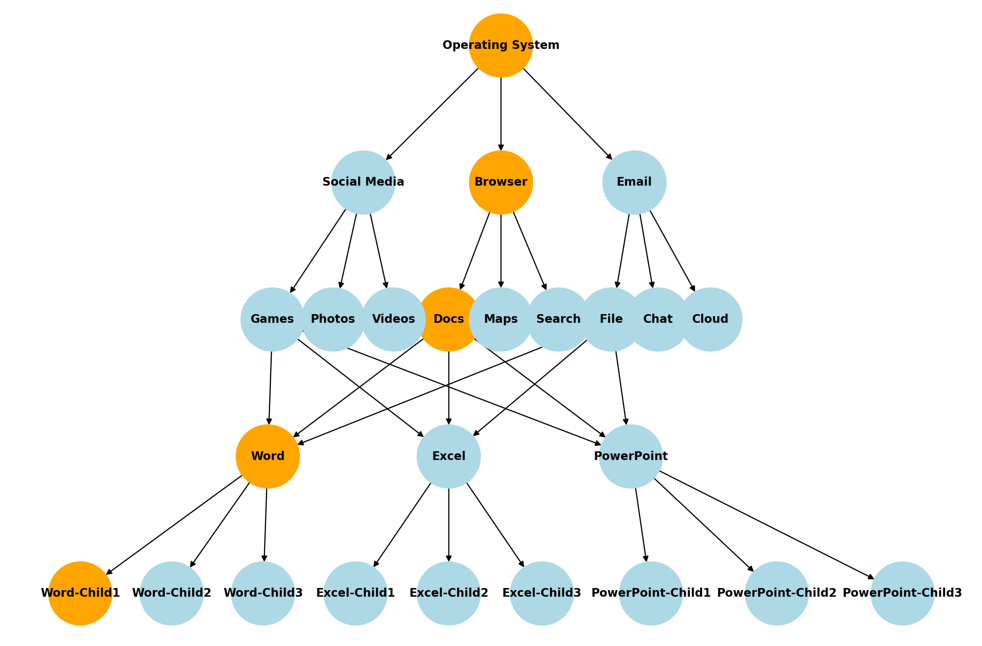
